<div style="text-align: center;">
<h1 style="font-weight: bold; margin: 20px 0;">
LPS Training - Intermediate Level: Analyzing Sea Surface Temperature and El Niño in a Changing Climate using ESA CCI Data
</h1>
</div>

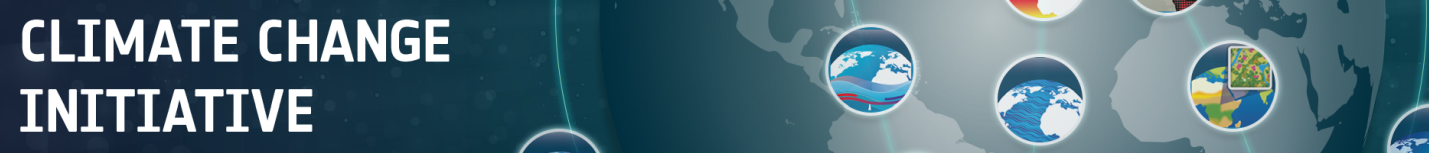

In [46]:
from IPython.display import Image, display
display(Image(filename='CCI_logo.PNG'))

<div style="background-color: #e6f3ff;  padding: 10px; border-left: 5px solid #e6f3ff;">
<h2 style="margin: 0 0 15px 0; font-size: 1.4em;">Introduction:</h2>

**What drives changes in global weather patterns? Why do some years bring more droughts, floods, or extreme temperatures than others -- and how might this be changing in a warming world?**

This notebook explores one of the most influential climate phenomena on Earth: **El Niño**. Using open climate data from the **ESA Climate Change Initiative (CCI)**, we will investigate how El Niño manifests in the ocean, affects the land and atmosphere, and leaves its fingerprint across multiple Essential Climate Variables (ECVs). Further, we will try to see how it interacts with broader climate trends. As climate change progresses, scientists are increasingly asking: Is El Niño itself changing?

We’ll use real-world data to explore not only the signature of El Niño across multiple Essential Climate Variables (ECVs), but also whether climate change is altering its frequency, intensity, or impacts.

### Questions We Aim to Explore

1. **What are the oceanic symptoms of El Niño?**
   * Can we detect the warming of the Pacific Ocean using satellite-derived sea surface temperatures?
     
2. **How does El Niño affect sea level, cloud cover, and rainfall?**
   * Do we see changes in the ocean surface height or shifts in the cloud structure?
     
3. **What signals do we find over land?**
   * How are soil moisture and land surface temperature impacted during El Niño years?
     
4. **Can we confirm El Niño's footprint across multiple climate variables?**
   * Does the timing and location of anomalies align across oceanic and terrestrial parameters?
  
5. **How might climate change be influencing El Niño?**
   * Do we see signs of increased extremes, shifting patterns, or enhanced regional impacts in recent decades?

### What You’ll Learn

By working through this notebook, you will:

* Access and explore CCI datasets using the ESA Climate Toolbox
* Create regional and temporal subsets of climate variables
* Visualize and analyze time series and spatial patterns
* Compare strong El Niño events (e.g., 1997, 2015) with neutral or La Niña years
* Reflect on the potential influence of climate change on El Niño behavior and impacts
* Optionally: explore uncertainties in cloud data and other advanced features
</div>

## What is El Niño?
El Niño is Spanish for "*the Christ Child*" and is named after the Christmas season when it typically occurs. During an El Niño event, a mass of warm water is transported by wind circulation from the western to the eastern Pacific. 

The cool, nutrient-rich water - normally present off the western coast of South America, containing large fish populations - is replaced by warm water from the west. This leads to a decline in fish stocks and heavy rainfall due to increased moisture, often resulting in floods. On the other hand, the Australian coast experiences a lack of humidity, causing draughts and wildfires. El Niño is not just an oceanic phenomenon - it affects all spheres. Tracking El Niño via satellite measurements enables us to take precautions and better prepare for its impacts on weather and environment. 

In this Climate from Space story, you can see more information about the most recent El Niño event in 2023 [(Link)](https://cfs.climate.esa.int/index.html#/stories/story-43/0).

Now, let's have a look at the data and how we can identify and analyse such El Niño events ourselves, using the the CCI data portal with the `esa_climate_toolbox`.

## Does climate change affect El Niño?
The effect of climate change and rising sea surface temperatures (SSTs) on El Niño is still not fully understood. Some models suggest that the frequency of El Niño events may not change significantly, but the events could become more intense in terms of weather extremes, such as rainfall and drought, depending on the region.

However, predicting changes in atmospheric circulation driven by rising SSTs remains a major challenge for climate models. As a result, the influence of SST on El Niño is associated with high uncertainty.



## Step 1: Setup & Connect to ESA CCI

In this section, we import the required Python packages to work with ESA Climate Change Initiative (CCI) data. Most notably, we use the [ESA Climate Toolbox](https://esa-climate-toolbox.readthedocs.io/en/latest/) which simplifies access, manipulation, and visualization of CCI datasets in Python.

These packages allow us to:
- Access satellite-based climate data records from ESA.
- Handle geospatial and temporal dimensions efficiently.
- Visualize data with intuitive plotting tools.

📚 For a broader introduction to the toolbox and how to install it, visit:  
🔗 [ESA CCI Climate Toolbox Quick Start](https://esa-climate-toolbox.readthedocs.io/en/latest/quick_start.html#jupyter-notebooks)  
🔗 [ESA Climate Data Toolbox Website](https://climate.esa.int/en/data/toolbox/)

In [1]:
# ESA Climate Toolbox imports for accessing and plotting ESA CCI data
from esa_climate_toolbox.core import get_op              # Get predefined operations (e.g., time series, averages)
from esa_climate_toolbox.core import list_ecv_datasets   # List available datasets per ECV (Essential Climate Variable)
from esa_climate_toolbox.core import get_store           # Connect to an ESA data store
from esa_climate_toolbox.core import list_datasets       # List all datasets in a store
from esa_climate_toolbox.ops import plot                 # High-level plotting functions for CCI data

# Used for connecting to remote data sources (e.g., ESA CCI ODP)
from xcube.core.store import new_data_store

# For displaying geographic regions interactively (if desired)
from IPython.display import GeoJSON
import shapely.geometry   # Handling geometric objects like bounding boxes

# Core data science libraries
import pandas as pd       # For tabular data handling and time manipulation
import numpy as np        # For numerical operations
import xarray as xr       # For multi-dimensional climate data structures

# Mapping and plotting
import matplotlib.pyplot as plt       # Plotting library
import cartopy.crs as ccrs            # Cartographic projections for spatial data

# Notebook settings
import warnings
warnings.filterwarnings("ignore") # Suppressing warnings to keep notebook output clean
%matplotlib inline

The ESA Climate Toolbox provides direct access to the **ESA Climate Data Store**, which hosts harmonized satellite-based climate data records produced under the **ESA Climate Change Initiative (CCI)**.

In this step, we establish a connection to the data store so we can browse and open datasets. This connection allows us to access data **without having to download files manually** — a convenient way to explore and analyze large geospatial datasets in cloud-friendly formats such as **Zarr** or **Kerchunk**.

The data store includes a wide range of essential climate variables (ECVs), such as aerosols, land surface temperature, sea level, and soil moisture.

📘 Learn more about available datasets:  
🔗 [ESA Climate Data Toolbox – Quick Start Guide](https://esa-climate-toolbox.readthedocs.io/en/latest/quick_start.html#data-access)

First, we explore how to access sea surface temperature (SST) data from the ESA Climate Change Initiative (CCI) data store. This includes identifying datasets of interest, understanding their metadata, and preparing for subsequent analysis.

## Step 2: Explore the SST Dataset
Identify SST datasets based on spatial and temporal requirements. The `list_ecv_datasets` command returns the names of datasets for a given ECV.

In [2]:
list_ecv_datasets("SST")

[('esacci.SST.climatology.L4.SSTdepth.multi-sensor.multi-platform.Climatology.2-2.r1',
  'esa-cci'),
 ('esacci.SST.day.L3C.SSTskin.AATSR.Envisat.AATSR.2-1.day', 'esa-cci'),
 ('esacci.SST.day.L3C.SSTskin.AATSR.Envisat.AATSR.2-1.night', 'esa-cci'),
 ('esacci.SST.day.L3C.SSTskin.ATSR-2.ERS-2.ATSR2.2-1.day', 'esa-cci'),
 ('esacci.SST.day.L3C.SSTskin.ATSR-2.ERS-2.ATSR2.2-1.night', 'esa-cci'),
 ('esacci.SST.day.L3C.SSTskin.ATSR.ERS-1.ATSR1.2-1.day', 'esa-cci'),
 ('esacci.SST.day.L3C.SSTskin.ATSR.ERS-1.ATSR1.2-1.night', 'esa-cci'),
 ('esacci.SST.day.L3C.SSTskin.AVHRR-2.NOAA-11.AVHRR11_G.2-1.day', 'esa-cci'),
 ('esacci.SST.day.L3C.SSTskin.AVHRR-2.NOAA-11.AVHRR11_G.2-1.night', 'esa-cci'),
 ('esacci.SST.day.L3C.SSTskin.AVHRR-2.NOAA-12.AVHRR12_G.2-1.day', 'esa-cci'),
 ('esacci.SST.day.L3C.SSTskin.AVHRR-2.NOAA-12.AVHRR12_G.2-1.night', 'esa-cci'),
 ('esacci.SST.day.L3C.SSTskin.AVHRR-2.NOAA-14.AVHRR14_G.2-1.day', 'esa-cci'),
 ('esacci.SST.day.L3C.SSTskin.AVHRR-2.NOAA-14.AVHRR14_G.2-1.night', 'esa-cc

### Background: zarr & kerchunk & NetCDF format
For the SST data it might be a good idea to use the zarr or kerchunk format, as data loading will be much faster.
Several CCI data records are available in these formats as they have some advantages. 
Zarr is ideal for new datasets that will be frequently accessed, updated, or analyzed and it is suitable for large-scale distributed processing in cloud-native workflows.
Kerchunk is best for efficiently accessing legacy data formats (e.g., NetCDF, GRIB) stored in object stores without converting them and useful when data duplication must be avoided.
NetCDF, while widely used and highly compatible with scientific tools, is less optimized for cloud-native workflows and accessing large datasets efficiently, making it better suited for smaller-scale, traditional file-based analysis.

| **Feature**                      | **Zarr**                                     | **Kerchunk**                                 | **NetCDF**                                                |
|----------------------------------|----------------------------------------------|----------------------------------------------|-----------------------------------------------------------|
| **Storage Format**               | Self-contained, new format                   | Wrapper for existing formats                 | Traditional file-based format                             |
| **Cloud-Native**                 | Yes                                          | Yes                                          | No                                                        |
| **Efficiency**                   | Good for accessing subsets                   | Great for legacy data in object stores       | Efficient for small to medium files                       |
| **Compression**                  | Supports multiple algorithms                 | Depends on underlying format                 | Limited to format-specific methods                        |
| **Metadata Handling**            | Embedded metadata                            | External JSON index                          | Embedded in file                                          |
| **Read/Write Access**            | Supports both                                | Read-only                                    | Read and write                                            |
| **Setup Overhead**               | None, works out of the box                   | Requires pre-generated JSON indices          | None, but slower for large datasets                       |
| **Storage Duplication**          | Requires duplicating data                    | Minimal, uses existing files                 | Minimal, as data is stored in single files                |
| **Performance**                  | Optimized for chunk-based access             | Slight overhead for index lookup             | Can be slow for very large files                          |
| **Selective loading**            | Not supported, entire dataset must be loaded | Not supported, entire dataset must be loaded | Allows selecting variables and time ranges before loading |

## Step 3: Load & Visualize Global SST
### Define the Dataset ID
To work with a specific ESA CCI dataset, we need to specify its **dataset ID**. This unique identifier tells the toolbox which variable and product we want to access.

In this section, we are using a the sea surface temperature (SST) zarr file. You can find the variables of the products under **data_vars**. For the SST, we will use the variable **analysed_sst**. 

First, we define the dataset ID and the store from which we retrieve the data (for the SST it is `esa-cci-zarr`). With the command `describe_data`, we can have a look at the structure of the file, such as time, dimension and the variable stored within.

In [10]:
data_id = 'ESACCI-L4_GHRSST-SST-GMPE-GLOB_CDR2.0-1981-2016-v02.0-fv01.0.zarr' 
cci_zarr_store = new_data_store("esa-cci-zarr")

### Describe Dataset (Check Available Variables and Metadata)

Before loading the full dataset, it’s helpful to **inspect the metadata** to understand its structure. This includes:

- Available variables (e.g., SST, uncertainty estimates)
- Temporal and spatial coverage
- Data format and structure

This step ensures we know what the dataset contains and how to work with it. It also helps confirm that the variable we want to plot or analyze is actually included.

🛠️ Tip: You can use the description to verify variable names, dimensions (e.g., `lat`, `lon`, `time`), and time coverage.

📘 More on dataset structure:  
🔗 [ESA Climate Toolbox – Data Access](https://esa-climate-toolbox.readthedocs.io/en/latest/quick_start.html#accessing-data)

In [11]:
cci_zarr_store.describe_data(data_id)

### Open the Dataset

Now we open the dataset using the zarr. When using the zarr format, the whole dataset is loaded. We will later use the cci-store where we can define the variables and time range we are interested in. For now, let's load the entire dataset:

In [12]:
sst_ds = cci_zarr_store.open_data(
    data_id=data_id)
display(sst_ds)

<xarray.Dataset> Size: 4TB
Dimensions:             (time: 12784, lat: 720, lon: 1440, fields: 16,
                         field_name_length: 50, fieldsp1: 17)
Coordinates:
  * field_name_length   (field_name_length) int32 200B 1 2 3 4 5 ... 47 48 49 50
  * fields              (fields) int32 64B 1 2 3 4 5 6 7 ... 11 12 13 14 15 16
  * fieldsp1            (fieldsp1) int32 68B 1 2 3 4 5 6 7 ... 12 13 14 15 16 17
  * lat                 (lat) float32 3kB -89.88 -89.62 -89.38 ... 89.62 89.88
  * lon                 (lon) float32 6kB -179.9 -179.6 -179.4 ... 179.6 179.9
  * time                (time) datetime64[ns] 102kB 1982-01-01T12:00:00 ... 2...
Data variables:
    analysed_sst        (time, lat, lon) float64 106GB dask.array<chunksize=(16, 720, 720), meta=np.ndarray>
    analysis_number     (time, lat, lon) float64 106GB dask.array<chunksize=(16, 720, 720), meta=np.ndarray>
    anomaly_fields      (time, fields, lat, lon) float64 2TB dask.array<chunksize=(16, 16, 720, 720), meta=np.ndarray>
    field_name          (fields, field_name_length) |S1 800B dask.array<chunksize=(16, 50), meta=np.ndarray>
    gradient_fields     (time, fieldsp1, lat, lon) float64 2TB dask.array<chunksize=(16, 17, 720, 720), meta=np.ndarray>
    median_type         (time, lat, lon) float64 106GB dask.array<chunksize=(16, 720, 720), meta=np.ndarray>
    standard_deviation  (time, lat, lon) float64 106GB dask.array<chunksize=(16, 720, 720), meta=np.ndarray>
Attributes: (12/47)
    Conventions:                CF-1.4
    acknowledgment:             Funded by ESA
    cdm_data_type:              grid
    comment:                    
    creator_email:              science.leader@esa-sst-cci.org
    creator_name:               SST_cci
    ...                         ...
    summary:                    An ensemble product with input from a number ...
    time_coverage_end:          20170101T000000Z
    time_coverage_start:        20161231T000000Z
    title:                      Global SST Ensemble, L4 GMPE
    uuid:                       dc0c5b25-93bf-4943-aba1-7f0de9109620
    westernmost_longitude:      -180.0

### Visualize Results

We now create a simple map plot of the selected variable.  
This allows us to explore the spatial patterns of the SST. Here, we define two dates and plot them next to each other to compare the El Nino in December 1997 with the SST one year later in December 1998.

For more interactive and advanced visualizations, check out the [ESA Climate Toolbox](https://climate.esa.int/en/data/toolbox/) or the [Toolbox documentation](https://esa-climate-toolbox.readthedocs.io/en/latest/quick_start.html#jupyter-notebooks).

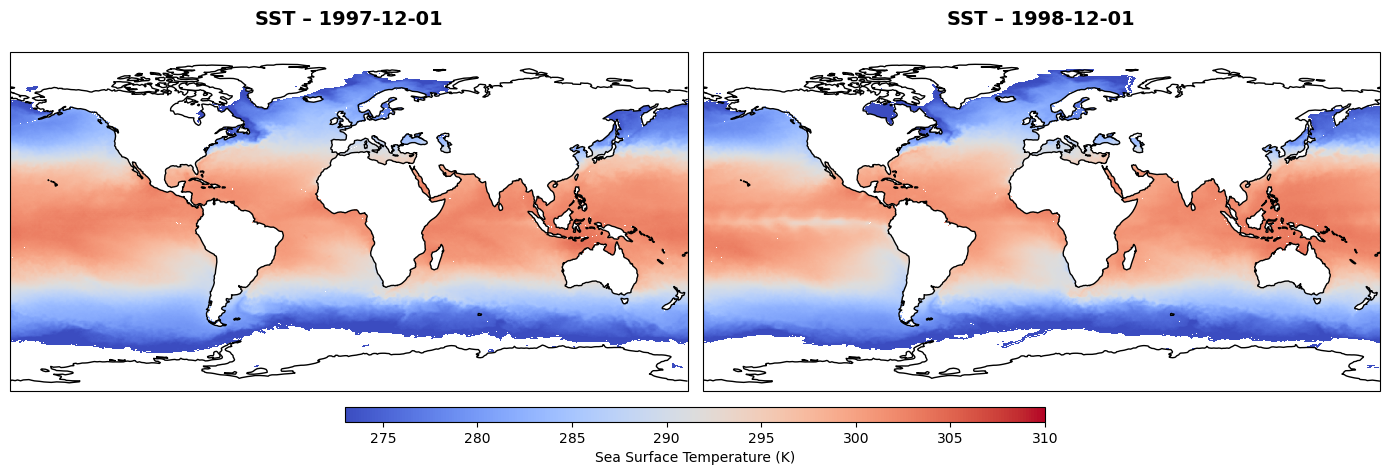

In [25]:
# Defining the time steps to plot
timesteps = ['1997-12-01', '1998-12-01']

# Starting the plot
fig, axes = plt.subplots(
    nrows=1, ncols=2, figsize=(14, 5),
    subplot_kw={'projection': ccrs.PlateCarree()}
)

# Looping over the time steps defined above
for i, timestep in enumerate(timesteps):
    ax = axes[i]
    sst = sst_ds["analysed_sst"].sel(time=timestep, method='nearest').squeeze().load()
    lat = sst_ds["lat"].values
    lon = sst_ds["lon"].values

    mesh = ax.pcolormesh(
        lon, lat, sst,
        transform=ccrs.PlateCarree(),
        cmap="coolwarm", vmin=273, vmax=310
    )
    
    ax.coastlines()
    ax.set_title(f"SST – {timestep}",fontsize=14, pad=20, weight='bold')


# Manually adding a colorbar below the plots
cbar_ax = fig.add_axes([0.25, 0.1, 0.5, 0.03])  
cbar = fig.colorbar(mesh, cax=cbar_ax, orientation='horizontal')
cbar.set_label("Sea Surface Temperature (K)")

# Saving the figure - make sure these commands are written before using plt.show()
# Please note that exporting the figure as pdf might take a while as it is exported as vector graphic

# To export the figure as pdf, uncomment the next line: 
#plt.savefig('Global_SST_Dec1997_vs_Dec1998.pdf',bbox_inches='tight') # bbox_inches='tight' ensures no white space around the plot

# To export the figure as png, uncomment the next line:
#plt.savefig('Global_SST_Dec1997_vs_Dec1998.png') 

plt.show()

### What Do We See?

The two maps show global Sea Surface Temperature (SST) in December 1997 (left) and December 1998 (right).  
These years mark a transition from a strong **El Niño** event to a **La Niña** phase.

Focus on the **equatorial Pacific** region — especially along the west coast of South America.

- In **December 1997**, SSTs are significantly warmer than usual across the central and eastern Pacific. This warm band is a classic signature of El Niño.
- In **December 1998**, we see the opposite: cooler waters dominate the same region, indicating the onset of La Niña.

These opposing ocean states have far-reaching effects on global weather, ecosystems, and even economies.  
This visual comparison helps us recognize how large-scale climate anomalies manifest in satellite observations.

### Calculate an plot the global mean of SST

To undertand how the SST has been changing during the last decades, we can calculate the mean across all latitudes and longitudes and plot a time series of the mean SST. 

In [14]:
# Define the time series mean operation
# This calculates the mean SST over the selected region for each time step
ts_mean_op = get_op('tseries_mean')

# Apply the operation to the subset dataset
sst_global_mean = ts_mean_op(
    ds=sst_ds,
    var='analysed_sst'    
).compute()

# Show the result
display(sst_global_mean)

<xarray.Dataset> Size: 316kB
Dimensions:            (field_name_length: 50, fields: 16, fieldsp1: 17,
                        lat: 720, lon: 1440, time: 12784)
Coordinates:
  * field_name_length  (field_name_length) int32 200B 1 2 3 4 5 ... 47 48 49 50
  * fields             (fields) int32 64B 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16
  * fieldsp1           (fieldsp1) int32 68B 1 2 3 4 5 6 7 ... 12 13 14 15 16 17
  * lat                (lat) float32 3kB -89.88 -89.62 -89.38 ... 89.62 89.88
  * lon                (lon) float32 6kB -179.9 -179.6 -179.4 ... 179.6 179.9
  * time               (time) datetime64[ns] 102kB 1982-01-01T12:00:00 ... 20...
Data variables:
    analysed_sst_mean  (time) float64 102kB 290.4 290.4 290.3 ... 290.5 290.5
    analysed_sst_std   (time) float64 102kB 9.701 9.674 9.676 ... 9.907 9.909
Attributes: (12/47)
    Conventions:                CF-1.4
    acknowledgment:             Funded by ESA
    cdm_data_type:              grid
    comment:                    
    creator_email:              science.leader@esa-sst-cci.org
    creator_name:               SST_cci
    ...                         ...
    summary:                    An ensemble product with input from a number ...
    time_coverage_end:          20170101T000000Z
    time_coverage_start:        20161231T000000Z
    title:                      Global SST Ensemble, L4 GMPE
    uuid:                       dc0c5b25-93bf-4943-aba1-7f0de9109620
    westernmost_longitude:      -180.0

We can also calculate the yearly mean of the global SST, so we can observe the overall trend in temperature.

In [16]:
sst_yearly_mean = sst_global_mean.resample(time='1YE').mean()

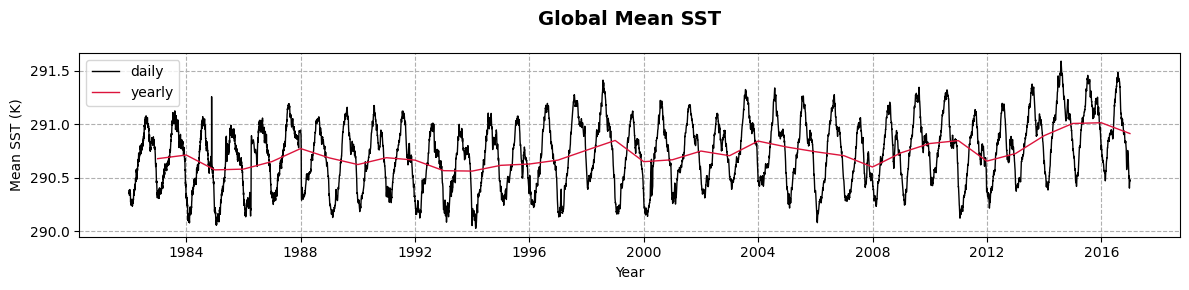

In [27]:
# Plotting the global mean SST
fig = plt.figure(figsize=(12,3))
# Daily mean SST
sst_global_mean.analysed_sst_mean.plot(c='k',linewidth=1,label='daily')
# Yearly mean SST
sst_yearly_mean.analysed_sst_mean.plot(c='crimson',linewidth=1,label='yearly')
# Add the legend
plt.legend()
# Add a grid 
plt.grid(True, which='both',linestyle='--')
# Add a title and axis labels
plt.title('Global Mean SST',fontsize=14, pad=20, weight='bold')
plt.ylabel('Mean SST (K)')
plt.xlabel('Year')

# Saving the figure - make sure these commands are written before using plt.show()

# To export the figure as pdf, uncomment the next line: 
#plt.savefig('Global_Mean_SST.pdf',bbox_inches='tight') # bbox_inches='tight' ensures no white space around the plot

# To export the figure as png, uncomment the next line:
#plt.savefig('Global_Mean_SST.png') 

plt.show()

We can see that the yearly mean temperature has been rising during the past years. The daily mean SST shows that the minima and maxima are increasing over time. 

## Step 4: Zooming In – Investigating El Niño in the Eastern Pacific

In the previous step, we observed the global Sea Surface Temperature patterns for an El Niño year and a non-El Niño year.

To better understand the dynamics of this climate phenomenon, we now define a **region of interest** that captures the **core area of warming during El Niño events**.

We will focus on the **eastern equatorial Pacific**, specifically the region between the **Galápagos Islands and the coast of Ecuador**.
This smaller area reduces the data load and allows us to analyze **temporal trends** more efficiently in later steps.

In [28]:
# Set bounding box the eastern Pacific and the rainforest
bbox = (-92.0, -2.0, -80.0, 1.0)  
# Display bounding box for reference
GeoJSON(shapely.geometry.box(*bbox).__geo_interface__)

<IPython.display.GeoJSON object>

### Create a spacial subset of the SST:

To focus our analysis on the eastern Pacific region most affected by El Niño, we now extract a **spatial subset** from the global SST dataset.
Using the bounding box we defined earlier, the function `subset_spatial` filters the dataset to include only the relevant area.
This helps reduce data volume and enables more targeted visualizations and calculations in the following steps.

In [29]:
subset_spatial_op = get_op('subset_spatial')
sst_sub = subset_spatial_op(ds=sst_ds, region=bbox)

### Calculate the mean SST of the subset region

To better understand how sea surface temperature varies over time in our selected region, we now calculate the **regional mean SST time series**.
We use the `tseries_mean` operation from the ESA Climate Toolbox to compute the average SST across all grid points within the selected area for each timestep. This creates a simplified view of how SST changed over time in this key region affected by El Niño.
These pre-defined operations are useful for quick analysis without needing to write complex code.

The available operations can be listed as follows:

In [30]:
from esa_climate_toolbox.core import list_operations

list_operations()

['add_dataset_values_to_geodataframe',
 'adjust_spatial_attrs',
 'adjust_temporal_attrs',
 'aggregate_statistics',
 'animate_map',
 'anomaly_external',
 'anomaly_internal',
 'arithmetics',
 'as_geodataframe',
 'climatology',
 'coregister',
 'data_frame_max',
 'data_frame_min',
 'data_frame_subset',
 'detect_outliers',
 'diff',
 'find_closest',
 'fourier_analysis',
 'gapfill',
 'merge',
 'normalize',
 'plot',
 'plot_contour',
 'plot_hist',
 'plot_line',
 'plot_map',
 'plot_scatter',
 'query',
 'reduce',
 'resample',
 'select_features',
 'select_var',
 'statistics',
 'subset_spatial',
 'subset_temporal',
 'subset_temporal_index',
 'temporal_aggregation',
 'to_dataframe',
 'to_dataset',
 'tseries_mean',
 'tseries_point']

We now define the `tseries_mean` operation and apply it to the dataset. This operation computes the **average value of the variable across the defined spatial subset for each timestep**, resulting in a **time series** that reflects how the regional mean SST evolves over time.

This is particularly helpful for detecting gradual changes or events like El Niño, which manifest as sustained temperature anomalies over months.

In [31]:
# Define the time series mean operation
# This calculates the mean SST over the selected region for each time step
ts_mean_op = get_op('tseries_mean')

# Apply the operation to the subset dataset
sst_mean = ts_mean_op(
    ds=sst_sub,
    var='analysed_sst'    
).compute()

# Show the result
display(sst_mean)

<xarray.Dataset> Size: 307kB
Dimensions:            (field_name_length: 50, fields: 16, fieldsp1: 17,
                        lat: 14, lon: 50, time: 12784)
Coordinates:
  * field_name_length  (field_name_length) int32 200B 1 2 3 4 5 ... 47 48 49 50
  * fields             (fields) int32 64B 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16
  * fieldsp1           (fieldsp1) int32 68B 1 2 3 4 5 6 7 ... 12 13 14 15 16 17
  * lat                (lat) float32 56B -2.125 -1.875 -1.625 ... 0.875 1.125
  * lon                (lon) float32 200B -92.12 -91.88 -91.62 ... -80.12 -79.88
  * time               (time) datetime64[ns] 102kB 1982-01-01T12:00:00 ... 20...
Data variables:
    analysed_sst_mean  (time) float64 102kB 297.3 297.3 297.3 ... 297.2 297.4
    analysed_sst_std   (time) float64 102kB 1.052 1.031 1.012 ... 1.235 1.296
Attributes: (12/53)
    Conventions:                CF-1.4
    acknowledgment:             Funded by ESA
    cdm_data_type:              grid
    comment:                    
    creator_email:              science.leader@esa-sst-cci.org
    creator_name:               SST_cci
    ...                         ...
    geospatial_lon_min:         -92.25
    geospatial_lon_max:         -79.75
    geospatial_lat_min:         -2.25
    geospatial_lat_max:         1.25
    geospatial_bounds_crs:      CRS84
    geospatial_bounds:          POLYGON((-92.25 -2.25, -92.25 1.25, -79.75 1....

### Plot the mean SST as time series
We now visualize the temporal evolution of the average global Sea Surface Temperature (SST) and the mean of our sub-region of interest in the eastern tropical Pacific.
This helps us to identify warming events, such as El Niño, which are typically marked by elevated SST values in this region.
We mark the El Niño periods with grey area so we can compare its effect on the SST. 

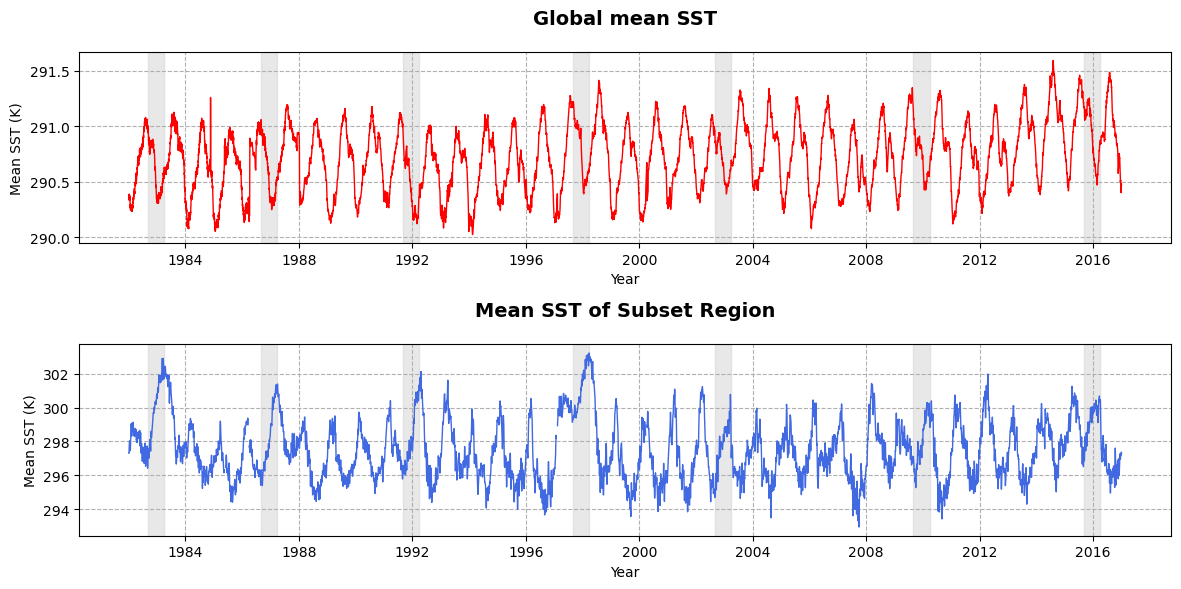

In [33]:
# Define El Niño winters
elnino_periods = [
    (1982, 9, 1983, 3),
    (1986, 9, 1987, 3),
    (1991, 9, 1992, 3),
    (1997, 9, 1998, 3),
    (2002, 9, 2003, 3),
    (2009, 9, 2010, 3),
    (2015, 9, 2016, 3),
]


# Plot
fig = plt.figure(figsize=(12, 6))
# add subplot 
ax = fig.add_subplot(2,1,1)

# Plot the SST mean
sst_global_mean.analysed_sst_mean.plot(ax=ax,c='red',linewidth=1)

# Add grey shading for El Niño winters
for start_y, start_m, end_y, end_m in elnino_periods:
    start_date = pd.Timestamp(start_y, start_m, 1)
    end_date = pd.Timestamp(end_y, end_m, 1) + pd.offsets.MonthEnd(0)
    ax.axvspan(start_date, end_date, color='lightgrey', alpha=0.5)

# Final touches
plt.grid(True, which='both', linestyle='--')
plt.title('Global mean SST',fontsize=14, pad=20, weight='bold')
plt.ylabel('Mean SST (K)')
plt.xlabel('Year')
plt.tight_layout()

ax2 = fig.add_subplot(2,1,2)

# Plot the SST mean
sst_mean.analysed_sst_mean.plot(ax=ax2, c='royalblue', linewidth=1)

# Add grey shading for El Niño winters
for start_y, start_m, end_y, end_m in elnino_periods:
    start_date = pd.Timestamp(start_y, start_m, 1)
    end_date = pd.Timestamp(end_y, end_m, 1) + pd.offsets.MonthEnd(0)
    ax2.axvspan(start_date, end_date, color='lightgrey', alpha=0.5)

# Final touches
plt.grid(True, which='both', linestyle='--')
plt.title('Mean SST of Subset Region',fontsize=14, pad=20, weight='bold')
plt.ylabel('Mean SST (K)')
plt.xlabel('Year')
plt.tight_layout()

# Saving the figure - make sure these commands are written before using plt.show()

# To export the figure as pdf, uncomment the next line: 
#plt.savefig('Global_and_Subset_Mean_SST.pdf',bbox_inches='tight') # bbox_inches='tight' ensures no white space around the plot

# To export the figure as png, uncomment the next line:
#plt.savefig('Global_and_Subset_Mean_SST.png') 

plt.show()

The plot shows a clear peak in SST during the winter of 1997/1998, corresponding to one of the strongest El Niño events on record.
Note how temperatures rise rapidly in late 1997 and drops again in 1998 — a typical temporal signature of El Niño.
These events are associated with major shifts in ocean-atmosphere circulation and can influence weather patterns globally. 
In the global mean SST we also see higher temperatures during El Niño winters compared to the other periodic winter minima. 


## Step 5: Which other ocean parameters are affected by El Niño?

We’ve seen that **sea surface temperatures (SST)** increased significantly in the eastern Pacific during the 1997/1998 El Niño event. But SST is just one symptom.  
El Niño also alters **sea level**, **currents**, and **ocean heat distribution**.

In this section, we’ll look at **Sea Level Anomalies (SLA)** to answer:

> *Does the rise in SST also lead to a rise in sea level in the same region?*

We’ll follow a similar process as before — listing available datasets, selecting a variable, and analyzing its changes during the El Niño event.

### How does El Niño affect sea level?

El Niño not only warms the surface ocean — it also redistributes heat and water across the Pacific. This can lead to measurable changes in **sea level**.  
By analyzing **Sea Level Anomaly (SLA)** data, we can investigate whether the eastern Pacific experienced a rise in sea level during the 1997/1998 El Niño event.

We begin by listing the available sea level datasets:

```python
list_ecv_datasets("SEALEVEL")

In [34]:
cci_store = new_data_store("esa-cci")
data_id = 'esacci.SEALEVEL.mon.L4.MSLA.multi-sensor.multi-platform.MERGED.2-0.r1'
cci_store.describe_data(data_id)

As we now use the esa-cci store, we can define the variable we wish to load. Here, we choose the sea level anomaly (sla):

In [35]:
variables = ['sla'] # we choose the sea level anomaly (sla)
sla_ds = cci_store.open_data(
    data_id=data_id,
    variable_names=variables,
)

Let’s visualize the sea level anomaly during the peak of El Niño and compare it to the conditions one year later. This helps us observe how sea levels respond to and recover from such events.

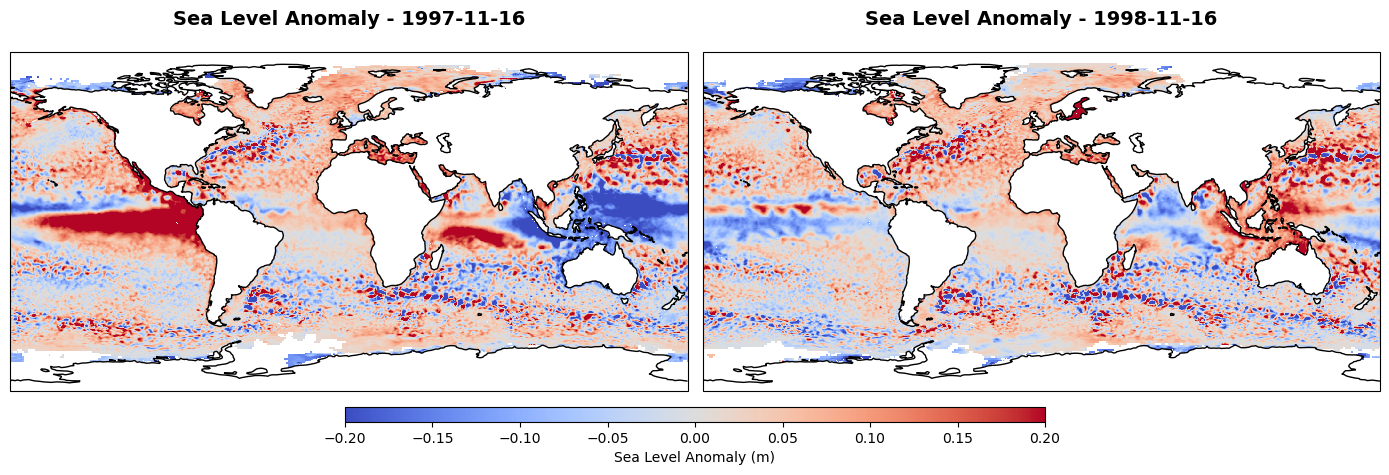

In [36]:
# Define the two time steps we want to compare (El Niño year and the year after)
timesteps = ['1997-12-01', '1998-12-01']

# Create a figure with two subplots, using a PlateCarree map projection
fig, axes = plt.subplots(
    nrows=1, ncols=2, figsize=(14, 5),
    subplot_kw={'projection': ccrs.PlateCarree()}
)

# Loop through the two selected time steps and plot each one
for i, timestep in enumerate(timesteps):
    ax = axes[i]
    
    # Select and load the data closest to the chosen date
    sla = sla_ds["sla"].sel(time=timestep, method='nearest').squeeze().load()
    
    # Extract latitude and longitude
    lat = sla_ds["lat"].values
    lon = sla_ds["lon"].values

    # Create the filled contour plot (color map of SLA)
    mesh = ax.pcolormesh(
        lon, lat, sla,
        transform=ccrs.PlateCarree(),
        cmap="coolwarm", vmin=-0.2, vmax=0.2
    )
    
    # Add coastlines and a title
    ax.coastlines()
    time_str = sla_ds['time'].sel(time=timestep, method='nearest').dt.strftime('%Y-%m-%d').item()
    ax.set_title('Sea Level Anomaly - ' + time_str,fontsize=14, pad=20, weight='bold')

# Add a single horizontal colorbar below the plots
cbar_ax = fig.add_axes([0.25, 0.1, 0.5, 0.03])  
cbar = fig.colorbar(mesh, cax=cbar_ax, orientation='horizontal')
cbar.set_label("Sea Level Anomaly (m)")


# Saving the figure - make sure these commands are written before using plt.show()
# Please note that exporting the figure as pdf might take a while as it is exported as vector graphic

# To export the figure as pdf, uncomment the next line: 
#plt.savefig('Global_SLA_Nov1997_vs_Nov1998.pdf',bbox_inches='tight') # bbox_inches='tight' ensures no white space around the plot

# To export the figure as png, uncomment the next line:
#plt.savefig('Global_SLA_Nov1997_vs_Nov1998.png') 


# Display the plot
plt.show()

The resulting plot shows **Sea Level Anomalies (SLA)** for two specific dates:

* **December 1997** — during a strong **El Niño** event
* **December 1998** — about a year later, during **neutral or La Niña** conditions

### What you see in the plot:

* **Colors** represent deviations from the average sea level (climatology):

  * **Red areas**: higher-than-average sea levels (positive anomaly)
  * **Blue areas**: lower-than-average sea levels (negative anomaly)

### Interpretation:

* In **December 1997**, the eastern equatorial Pacific (off the coast of Ecuador and Peru) typically shows **strong positive SLA**, a hallmark of El Niño. This reflects **warmer waters** piling up, causing the sea level to rise.
* In **December 1998**, that region likely shows **lower or negative SLA**, consistent with **cooling waters** during a La Niña or post-El Niño period.

### Why this matters:

* These changes are not just visual — they represent major shifts in ocean heat content, currents, and even global weather patterns.
* SLA is a valuable indicator of **ocean-atmosphere coupling**, especially in tracking El Niño–Southern Oscillation (ENSO) events.

<div style="background-color: #F7C363; padding: 10px; border-radius: 5px;">

## Choose Your Investigation

El Niño doesn’t just warm the ocean — it also disrupts weather patterns, shifts rainfall, and influences ecosystems on land.
In this section, you choose what to explore next:

* How does El Niño affect cloud cover?
* Is there a signal in land surface temperature?
* What changes do we observe in vegetation or soil moisture?

In this section, users can choose an Essential Climate Variable (ECV) they want to investigate. Uncomment the corresponding code snippet to load a specific dataset and then run the shared analysis steps (plotting, subsetting, averaging).

For each ECV, we also provide a guiding question or task to explore. Where possible, there's an additional advanced part for more experienced users.

👉 Pick a topic that interests you and follow the steps — or try several to compare results.

Once your variable is selected and dataset loaded, continue with the following steps:
- Plot a global map for El Niño and non-El Niño years
- Apply a spatial subset (region of interest)
- Calculate the temporal mean within this region
- Visualize as a time series or seasonal comparison

> 💡 Tip: Advanced users can explore uncertainty variables (e.g., cloud uncertainty) or apply temporal filtering.
<div >

### Option 1: Cloud Fraction

**Guiding question:** _Do cloud patterns change during El Niño events?_  
**Beginner task:** Compare mean cloud fraction during December 1997 (El Niño) and 1998 (neutral).  
**Advanced task:** Explore cloud uncertainty during El Niño and discuss where it is largest.

The following cell is defining the data_id for the cloud dataset and the variable cloud fraction. We also define parameters for the map plot, such as the limits for the colorbar, its label, and the figure title. 

In [9]:
#data_id = 'ESACCI-L3C_CLOUD-CLD_PRODUCTS-AVHRR_NOAA-1982-2016-fv3.0.zarr' 
#variable = ['cfc']
#colorbarlabel = "Cloud fraction (0 - 1)"
#ecvmin = 0
#ecvmax = 1
#ecvtitle = "Cloud Fraction"
#ecvcmap = 'Blues_r'

#cci_zarr_store = new_data_store("esa-cci-zarr")

#ecv_ds = cci_zarr_store.open_data(
#    data_id=data_id,
#)

#cci_zarr_store.describe_data(data_id)

### Option 2: Ocean Colour

**Guiding question:** _Does ocean productivity respond to El Niño?_  
**Beginner task:** Visualize chlorophyll concentrations in the eastern Pacific in 1997 vs 1998.  
**Advanced task:** Explore upwelling changes and their impact on biological activity.

The following cell is defining the data_id for the ocean color dataset and the variable chlorophyll a, an indicator for phytoplankton activity:

In [37]:
data_id = 'ESACCI-OC-L3S-OC_PRODUCTS-MERGED-1M_MONTHLY_4km_GEO_PML_OCx_QAA-1997-2022-fv6.0.zarr'
variable = ['chlor_a']
colorbarlabel = "log10(Chlorophyll-a) [log10(mg/m³)]"
ecvmin = -2
ecvmax = 1
ecvtitle = "Chlorophyll-a Concentration"
ecvcmap = 'viridis'

cci_zarr_store = new_data_store("esa-cci-zarr")

ecv_ds = cci_zarr_store.open_data(
    data_id=data_id,
)

cci_zarr_store.describe_data(data_id)

### Option 3: Soil Moisture

**Guiding question:** _How does soil moisture change during El Niño?_  
**Beginner task:** Compare soil moisture in southern Africa during 1997 vs 1998.  
**Advanced task:** Evaluate interannual variability or extreme dry/wet anomalies.

In [15]:
#data_id = 'ESACCI-SOILMOISTURE-L3S-SSMV-COMBINED-1978-2021-fv07.1.zarr'
#variable = ['sm']  
#colorbarlabel = "Soil Moisture (m³/m³)"
#ecvmin = 0
#ecvmax = 0.6
#ecvtitle = "Soil Moisture"
#ecvcmap = 'BrBG'

#cci_zarr_store = new_data_store("esa-cci-zarr")

#ecv_ds = cci_zarr_store.open_data(
#    data_id=data_id,
#)

#cci_zarr_store.describe_data(data_id)

### Option 4: Land Surface Temperature (LST)

**Guiding question:** _How does El Niño affect land temperatures?_  
**Beginner task:** Observe temperature anomalies in Australia during December 1997 and 1998.  
**Advanced task:** Compare LST changes between continents (Australia vs South America).

In [21]:
#data_id = 'esacci.LST.yr.L3C.LST.multi-sensor.multi-platform.SSMI_SSMIS.v2-33.ASC'
#variable = ['lst'] 
#colorbarlabel = "LST (K)"
#ecvmin = 230
#ecvmax = 320
#ecvtitle = "Land Surface Temperature"
#ecvcmap = 'inferno'
#cci_store = new_data_store("esa-cci")
#ecv_ds = cci_store.open_data(
#    data_id=data_id,
#)

#cci_store.describe_data(data_id)

### Visualize Global ECV Patterns

In this section, we visualize the selected Essential Climate Variable (ECV) on a global map for two key time points — typically during an El Niño event and a year afterward. This helps us identify how the variable responds to large-scale climate anomalies like El Niño.

The selected dates can be adjusted as needed, depending on your area of interest and the dataset’s time coverage. (Tip: Use `cci_zarr_store.describe_data()` to check available dates in the dataset.)

> This visual comparison is a powerful tool to explore spatial patterns, spot regional anomalies, and begin forming hypotheses about climate impacts.

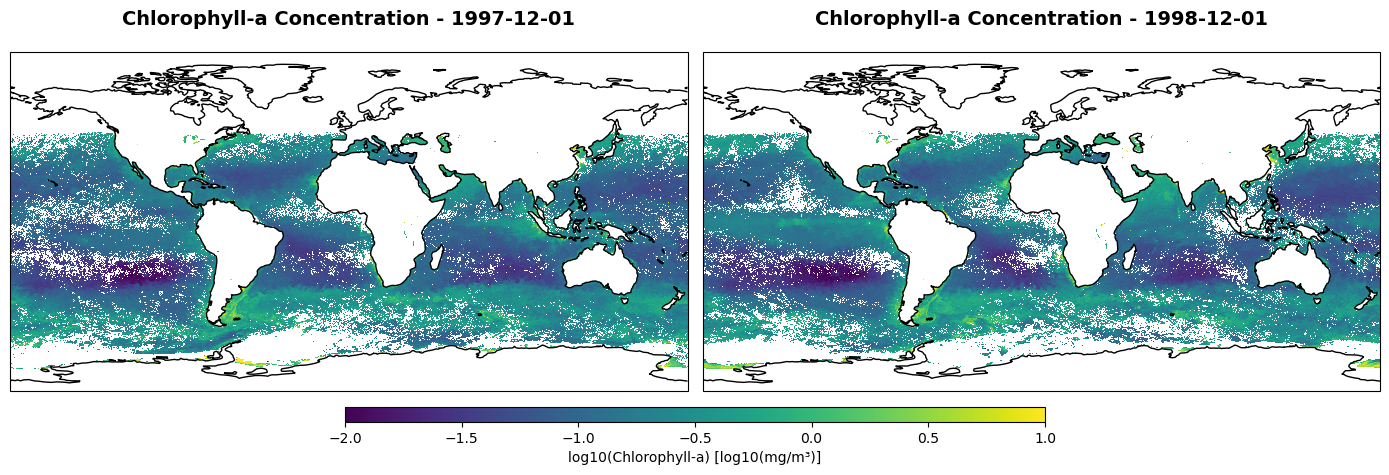

In [38]:
# Defining the time steps to plot
timesteps = ['1997-12-01', '1998-12-01']

# Starting the plot
fig, axes = plt.subplots(
    nrows=1, ncols=2, figsize=(14, 5),
    subplot_kw={'projection': ccrs.PlateCarree()}
)

# Looping over the time steps defined above
# Note that for the chlorophyll data, we want to plot the log, thus we include an if loop checking which variable has been chosen
for i, timestep in enumerate(timesteps):
    ax = axes[i]
    if variable[0] == 'chlor_a':
        ecv = np.log10(ecv_ds[variable[0]].sel(time=timestep, method='nearest').squeeze().load())
    else:
        ecv = ecv_ds[variable[0]].sel(time=timestep, method='nearest').squeeze().load()
    lat = ecv_ds["lat"].values
    lon = ecv_ds["lon"].values

    mesh = ax.pcolormesh(
        lon, lat, ecv,
        transform=ccrs.PlateCarree(),
        cmap=ecvcmap, vmin=ecvmin, vmax=ecvmax
    )
    
    ax.coastlines()
    # get timestep for title
    t = ecv_ds['time'].sel(time=timestep, method='nearest')
    time_str = t.dt.strftime('%Y-%m-%d').item()
    ax.set_title(ecvtitle + ' - ' + time_str,fontsize=14, pad=20, weight='bold')

# Manually adding a colorbar below the plots
cbar_ax = fig.add_axes([0.25, 0.1, 0.5, 0.03])  
cbar = fig.colorbar(mesh, cax=cbar_ax, orientation='horizontal')
cbar.set_label(colorbarlabel)

# Saving the figure - make sure these commands are written before using plt.show()
# Please note that exporting the figure as pdf might take a while as it is exported as vector graphic

# To export the figure as pdf, uncomment the next line: 
#plt.savefig('Global_ECV_1997_vs_1998.pdf',bbox_inches='tight') # bbox_inches='tight' ensures no white space around the plot

# To export the figure as png, uncomment the next line:
#plt.savefig('Global_ECV_1997_vs_1998.png') 


plt.show()

### What do we expect to see?

Depending on the selected variable, we might observe:

* **Cloud Fraction**: Increased or decreased cloudiness in the tropics, possibly linked to shifting convection zones.
* **Land Surface Temperature**: Warmer or cooler land surfaces, particularly in regions affected by altered precipitation and wind patterns.
* **Ocean Colour (Chlorophyll-a)**: Changes in ocean productivity, especially in the Pacific where upwelling is disrupted.
* **Soil Moisture**: Wetter or drier conditions in regions like Australia, Africa, or South America due to rainfall variability.

Use this map as a diagnostic tool to detect where major El Niño signals appear in your chosen variable.

### Regional Focus: Subset, Average & Time Series Plot

Now that we’ve looked at the global distribution, let’s zoom in on a specific region. By applying a spatial subset (bounding box), we can explore local responses to the El Niño event in more detail.

This step includes:

1. **Creating a Spatial Subset**
   Select a region of interest — for example, the eastern Pacific for ocean data or the Amazon basin for vegetation or soil moisture. Use a `bbox` (bounding box) to isolate that area.

2. **Calculating the Mean**
   We compute the average of the selected variable over the region for each timestep to reduce the data to a one-dimensional time series.

3. **Plotting the Time Series**
   The resulting plot shows how the variable changes over time in your chosen region, helping identify unusual behavior during the El Niño period.

> This step is particularly useful to detect shifts in trends, seasonal anomalies, or extreme values tied to climate variability. Choose a region relevant to your selected ECV (e.g., ocean for SST or chlorophyll, land for soil moisture or vegetation).

In [40]:
# lon_min, lat_min, lon_max, lat_max
bbox_amazon = (-75.0, -2.0, -65.0, 1.0) # bbox covering parts of the Amazon
bbox_ecu = (-92.0, -20.0, -80.0, 1.0)  # bbox covering Galapagos to Ecuador

land_ecv = ['sm','lst']
ocean_ecv = ['chlor_a','cfc'] # optional: put cloud fraction to land_cfc

if  variable[0] in land_ecv:
    bbox = bbox_amazon
    print(f"Chosen parameter: {variable[0]} -> selected bbox: {bbox_amazon}")
elif variable[0] in ocean_ecv:
    bbox = bbox_ecu
    print(f"Chosen parameter: {variable[0]} -> selected bbox: {bbox_ecu}")
else:
    print(f"{variable[0]} is not listed in land_ecv or ocean_ecv.")


Chosen parameter: chlor_a -> selected bbox: (-92.0, -20.0, -80.0, 1.0)


#### Create the spacial subset of the ECV

In [41]:
subset_spatial_op = get_op('subset_spatial')

ecv_sub = subset_spatial_op(ds=ecv_ds, region=bbox)

#### Calculate the mean over the subset

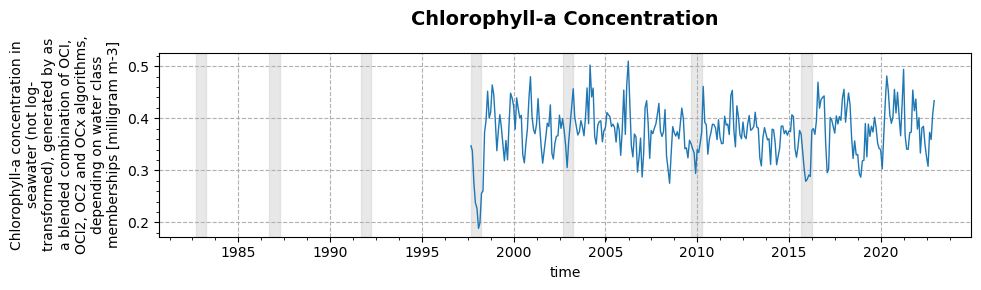

In [42]:
# Apply time series mean operation to the spatial subset
# This computes the mean value for each time step over the selected region
ts_mean_op = get_op('tseries_mean')

ecv_sub_mean = ts_mean_op(
    ds=ecv_sub,
    var=variable[0]   
).compute()

# Get the name of the resulting variable (can vary depending on input)
mean_var_name = list(ecv_sub_mean.data_vars)[0] 


# Define El Niño winters
elnino_periods = [
    (1982, 9, 1983, 3),
    (1986, 9, 1987, 3),
    (1991, 9, 1992, 3),
    (1997, 9, 1998, 3),
    (2002, 9, 2003, 3),
    (2009, 9, 2010, 3),
    (2015, 9, 2016, 3),
]

# Create a figure for plotting the time series
fig = plt.figure(figsize=(10, 3))
ax = fig.add_subplot()

# Plot the time series
ecv_sub_mean[mean_var_name].plot(linewidth=1)
# Add grey shading for El Niño winters
for start_y, start_m, end_y, end_m in elnino_periods:
    start_date = pd.Timestamp(start_y, start_m, 1)
    end_date = pd.Timestamp(end_y, end_m, 1) + pd.offsets.MonthEnd(0)
    ax.axvspan(start_date, end_date, color='lightgrey', alpha=0.5)


plt.title(ecvtitle,fontsize=14, pad=20, weight='bold')        # Title of the plot
ax.grid(axis='both', linestyle='--')  # Add grid lines for better readability
ax.minorticks_on()  # Enable minor ticks on both axes

# Saving the figure - make sure these commands are written before using plt.show()
# Please note that exporting the figure as pdf might take a while as it is exported as vector graphic

# To export the figure as pdf, uncomment the next line: 
#plt.savefig('Mean_ECV.pdf',bbox_inches='tight') # bbox_inches='tight' ensures no white space around the plot

# To export the figure as png, uncomment the next line:
#plt.savefig('Mean_ECV.png') 


plt.show()

Depending on the ECV and region you've chosen, the time series may reveal distinct patterns:

* **Sea Surface Temperature** might show a sharp rise during El Niño months, especially in the eastern Pacific.
* **Cloud Fraction** could increase or decrease depending on atmospheric convection changes over oceans or continents.
* **Land Surface Temperature** often rises in some regions (e.g., Australia or Indonesia), highlighting heatwave tendencies.
* **Soil Moisture** may decrease in areas affected by El Niño-induced droughts (e.g., parts of South America or Africa).

> Look for unusual peaks or drops during late 1997 to early 1998 — these often correspond to the peak El Niño phase. Advanced users may also explore interannual variability or compare multiple El Niño events across the time series.


<div style="background-color: #F7C363; padding: 10px; border-radius: 5px;">

### What next?
When examining the climate and its effects on climate variables, it is important to consider extreme events like El Niño, as well as the specific region being studied. These extreme weather patterns can often mask the underlying trends caused by climate change.

To better understand the overall trend of a variable, you can analyze larger or multiple regions, calculate averages, and explore how different variables interact with and influence one another.

If you'd like to read more on the effect of climate change on El Niño, you can read the studies which are trying to shed more light on this topic. 
Some examples are: 
* [Cai, W. et al. ENSO and greenhouse warming. Nature Clim Change 5, 849–859 (2015)](https://doi.org/10.1038/nclimate2743)
* [Fredriksen, H.-B. et al., How does El Niño-Southern Oscillation Change Under Global Warming - A First Look at CMIP6 (2020)](https://doi.org/10.1029/2020GL090640)

<div>

<div style="background-color: #f1c1c1; padding: 10px; border-radius: 5px;">

<div style="text-align: center;">
<h1 style="font-weight: bold; margin: 16px 0;">
Advanced data analysis
</h1>

If you are interested in using the data e.g. for publications or create through analysis, you need to understand how the data is produced and take into account the uncertainties of the data quality before interpreting them. 

In a seperate notebook, we are looking into the uncertainties of the cloud data, how to visualise it and how to interpret it. 

You can find the Jupyter notebook in this Github folder: [LPS_cloud_uncertainties.ipynb](https://github.com/esa-cci/ect-training/tree/main/lps_vienna_06_2025)
<div>